# Historical transactions cleaning

In [ ]:
import os
import pandas as pd
import numpy as np
from collections import Counter

# Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

# Random seed for reproducibility
seed = 202
np.random.seed(seed)

# Ignore warnings
import warnings
warnings.simplefilter('ignore')

# Garbage collector
import gc
gc.enable()

In [14]:
historical_transactions_df = pd.read_csv("historical_transactions.csv")
historical_transactions_df.shape

(29112361, 14)

In [15]:
historical_transactions_df.head()

,authorized_flag,card_id,city_id,category_1,installments,category_3,merchant_category_id,merchant_id,month_lag,purchase_amount,purchase_date,category_2,state_id,subsector_id
0,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-8,-0.703331,2017-06-25 15:33:07,1.0,16,37
1,Y,C_ID_4e6213e9bc,88,N,0,A,367,M_ID_86ec983688,-7,-0.733128,2017-07-15 12:10:45,1.0,16,16
2,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_979ed661fc,-6,-0.720386,2017-08-09 22:04:29,1.0,16,37
3,Y,C_ID_4e6213e9bc,88,N,0,A,560,M_ID_e6d5ae8ea6,-5,-0.735352,2017-09-02 10:06:26,1.0,16,34
4,Y,C_ID_4e6213e9bc,88,N,0,A,80,M_ID_e020e9b302,-11,-0.722865,2017-03-10 01:14:19,1.0,16,37


In [17]:
historical_transactions_df.isnull().sum()

authorized_flag               0
card_id                       0
city_id                       0
category_1                    0
installments                  0
category_3               178159
merchant_category_id          0
merchant_id              138481
month_lag                     0
purchase_amount               0
purchase_date                 0
category_2              2652864
state_id                      0
subsector_id                  0
dtype: int64

### Feature cleaning

#### authorized_flag

In [18]:
print(Counter(historical_transactions_df['authorized_flag']))

Counter({'Y': 26595452, 'N': 2516909})


In [19]:
# Change to boolean
historical_transactions_df = historical_transactions_df.replace({'authorized_flag': {'Y': True, 'N': False}})

In [20]:
print(Counter(historical_transactions_df['authorized_flag']))

Counter({True: 26595452, False: 2516909})


#### card_id

In [25]:
# Check if there are common card_id between train and test and if this value has more than one occurrence in the sets
print("Number of unique card_id in historical transactions set :",historical_transactions_df.card_id.nunique(), " out of rows : ",historical_transactions_df.shape[0])
print("Number of common card_id in train and historical transactions set (train unique card_id: %d): %d" % (train_df.shape[0],len(set(historical_transactions_df.card_id.unique()).intersection(set(train_df.card_id.unique())))))
print("Number of common card_id in test and historical transactions set (test unique card_id: %d): %d" % (test_df.shape[0],len(set(historical_transactions_df.card_id.unique()).intersection(set(test_df.card_id.unique())))))

Number of unique card_id in historical transactions set : 325540  out of rows :  29112361
Number of common card_id in train and historical transactions set (train unique card_id: 201917): 201917
Number of common card_id in test and historical transactions set (test unique card_id: 123623): 123623


#### category_1

In [27]:
print(Counter(historical_transactions_df['category_1']))

Counter({'N': 27028332, 'Y': 2084029})


In [28]:
# Change to boolean
historical_transactions_df = historical_transactions_df.replace({'category_1': {'Y': True, 'N': False}})

In [29]:
print(Counter(historical_transactions_df['category_1']))

Counter({False: 27028332, True: 2084029})


#### installments

In [30]:
print(Counter(historical_transactions_df['installments']))

Counter({0: 15411747, 1: 11677522, 2: 666416, 3: 538207, 4: 179525, -1: 178159, 6: 132634, 10: 118827, 5: 116090, 12: 55064, 8: 20474, 7: 10906, 9: 5772, 11: 830, 999: 188})


In [ ]:
# We must decide how to handle with -1 and 999

#### category_3

In [31]:
print(Counter(historical_transactions_df['category_3']))

Counter({'A': 15411747, 'B': 11677522, 'C': 1844933, nan: 178159})


In [32]:
historical_transactions_df['category_3'].fillna('D', inplace=True)

In [33]:
print(Counter(historical_transactions_df['category_3']))

Counter({'A': 15411747, 'B': 11677522, 'C': 1844933, 'D': 178159})


#### month_lag 
Number of months of delay before payment

In [35]:
print(Counter(historical_transactions_df['month_lag']))

Counter({-2: 3857276, -1: 3627430, 0: 3470946, -3: 3095651, -4: 2639805, -5: 2364790, -6: 2050048, -7: 1769844, -8: 1427846, -9: 1234724, -10: 1085053, -11: 1007878, -12: 791973, -13: 689097})


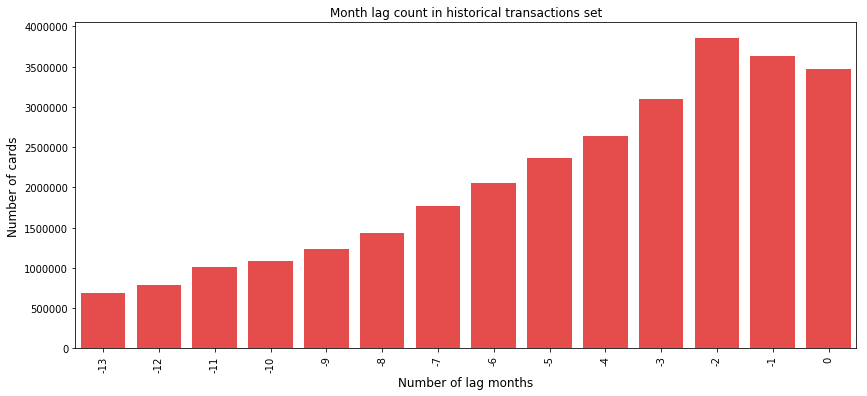

In [38]:
cnt_srs = historical_transactions_df['month_lag'].value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Number of lag months', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("Month lag count in historical transactions set")
plt.show()

#### purchase_date

In [49]:
purchase_date = pd.to_datetime(historical_transactions_df['purchase_date'], errors='coerce')
historical_transactions_df['purchase_date'] = purchase_date.dt.date
historical_transactions_df['purchase_month_year'] = purchase_date.dt.to_period('M')

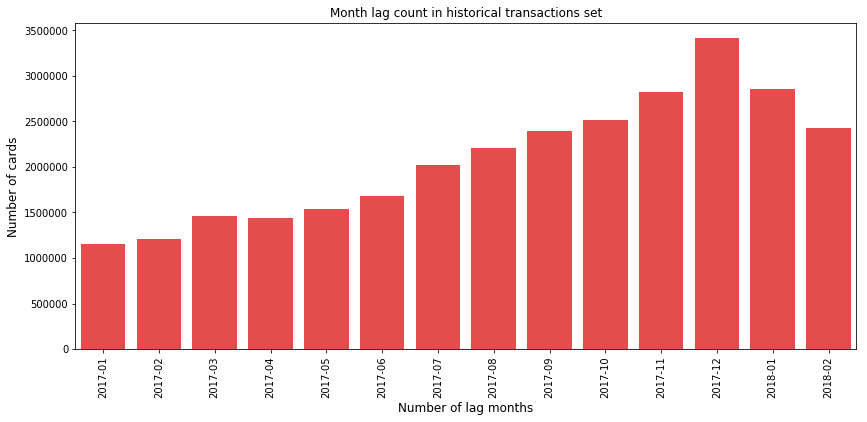

In [48]:
cnt_srs = historical_transactions_df['purchase_month_year'].value_counts()
cnt_srs = cnt_srs.sort_index()
plt.figure(figsize=(14,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color='red')
plt.xticks(rotation='vertical')
plt.xlabel('Number of lag months', fontsize=12)
plt.ylabel('Number of cards', fontsize=12)
plt.title("Month lag count in historical transactions set")
plt.show()

#### purchase_amount

#### category_2

In [ ]:
print(Counter(historical_transactions_df['category_2']))

In [57]:
historical_transactions['authorized_flag'].map{'Y': True, 'N': False}

SyntaxError: invalid syntax (<ipython-input-57-069a7cdc8997>, line 1)

In [ ]:
gdf = historical_transactions_df.groupby("card_id")
gdf = gdf["purchase_amount"].size().reset_index()
gdf.columns = ["card_id", "num_hist_transactions"]
train_df = pd.merge(train_df, gdf, on="card_id", how="left")
test_df = pd.merge(test_df, gdf, on="card_id", how="left")

## Merchants

In [78]:
merchants_df = pd.read_csv("merchants.csv")
merchants_df.shape

(334696, 22)

In [79]:
merchants_df.head()

,merchant_id,merchant_group_id,merchant_category_id,subsector_id,numerical_1,numerical_2,category_1,most_recent_sales_range,most_recent_purchases_range,avg_sales_lag3,...,avg_sales_lag6,avg_purchases_lag6,active_months_lag6,avg_sales_lag12,avg_purchases_lag12,active_months_lag12,category_4,city_id,state_id,category_2
0,M_ID_838061e48c,8353,792,9,-0.057471,-0.057471,N,E,E,-0.40,...,-2.25,18.666667,6,-2.32,13.916667,12,N,242,9,1.0
1,M_ID_9339d880ad,3184,840,20,-0.057471,-0.057471,N,E,E,-0.72,...,-0.74,1.291667,6,-0.57,1.687500,12,N,22,16,1.0
2,M_ID_e726bbae1e,447,690,1,-0.057471,-0.057471,N,E,E,-82.13,...,-82.13,260.000000,2,-82.13,260.000000,2,N,-1,5,5.0
3,M_ID_a70e9c5f81,5026,792,9,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,4.666667,6,NaN,3.833333,12,Y,-1,-1,NaN
4,M_ID_64456c37ce,2228,222,21,-0.057471,-0.057471,Y,E,E,NaN,...,NaN,0.361111,6,NaN,0.347222,12,Y,-1,-1,NaN
